In [1]:
import pandas as pd

sales_df = pd.read_csv('/workspaces/car_study_eda/data/raw/car_price_dataset.csv')

sales_df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [2]:
sales_df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [4]:
sales_df.duplicated().sum()
print(sales_df['Price'].duplicated().sum())

3339


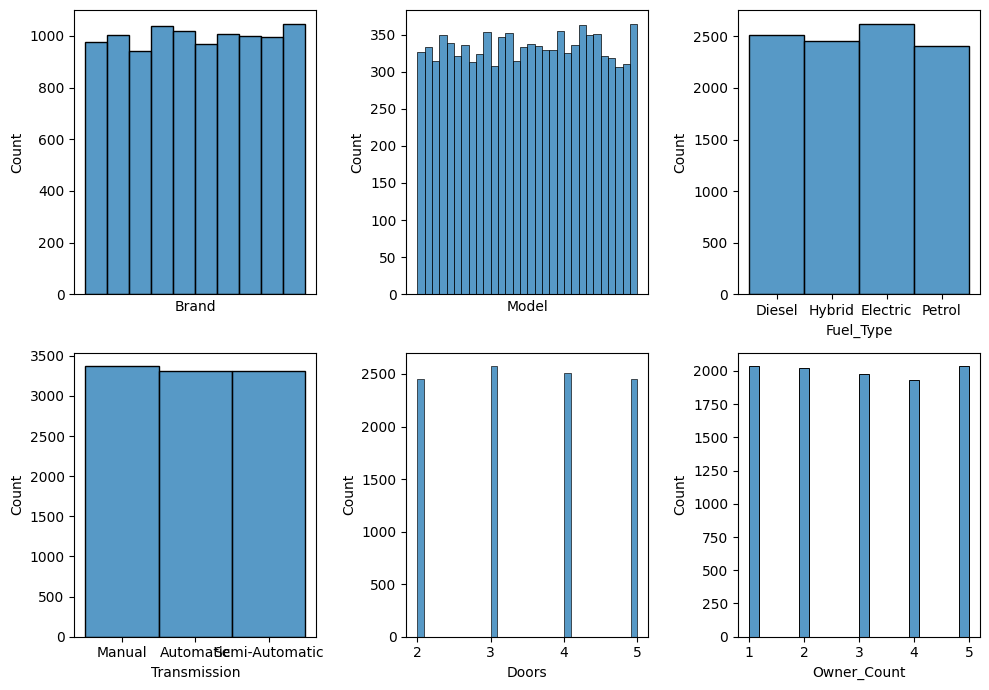

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2,3,figsize=(10,7))
#histogramas de las variables
sns.histplot(ax= axis[0,0],data=sales_df,x='Brand').set_xticks([])
sns.histplot(ax= axis[0,1],data=sales_df,x='Model').set_xticks([])
sns.histplot(ax= axis[0,2],data=sales_df,x='Fuel_Type')
sns.histplot(ax= axis[1,0],data=sales_df,x='Transmission')
sns.histplot(ax= axis[1,1],data=sales_df,x='Doors')
sns.histplot(ax= axis[1,2],data=sales_df,x='Owner_Count')
#plt.xticks(rotation=45, ha='right', fontsize=10)
#plt.setp(axis[0, 0].xaxis.get_majorticklabels(), rotation=90, ha='right')
#plt.setp(axis[1, 2].xaxis.get_majorticklabels(), rotation=90, ha='right')

#para borrar graficos en blanco
#fig.delaxes(axis[1,2])

plt.tight_layout()
plt.show()

<Axes: xlabel='Mileage'>

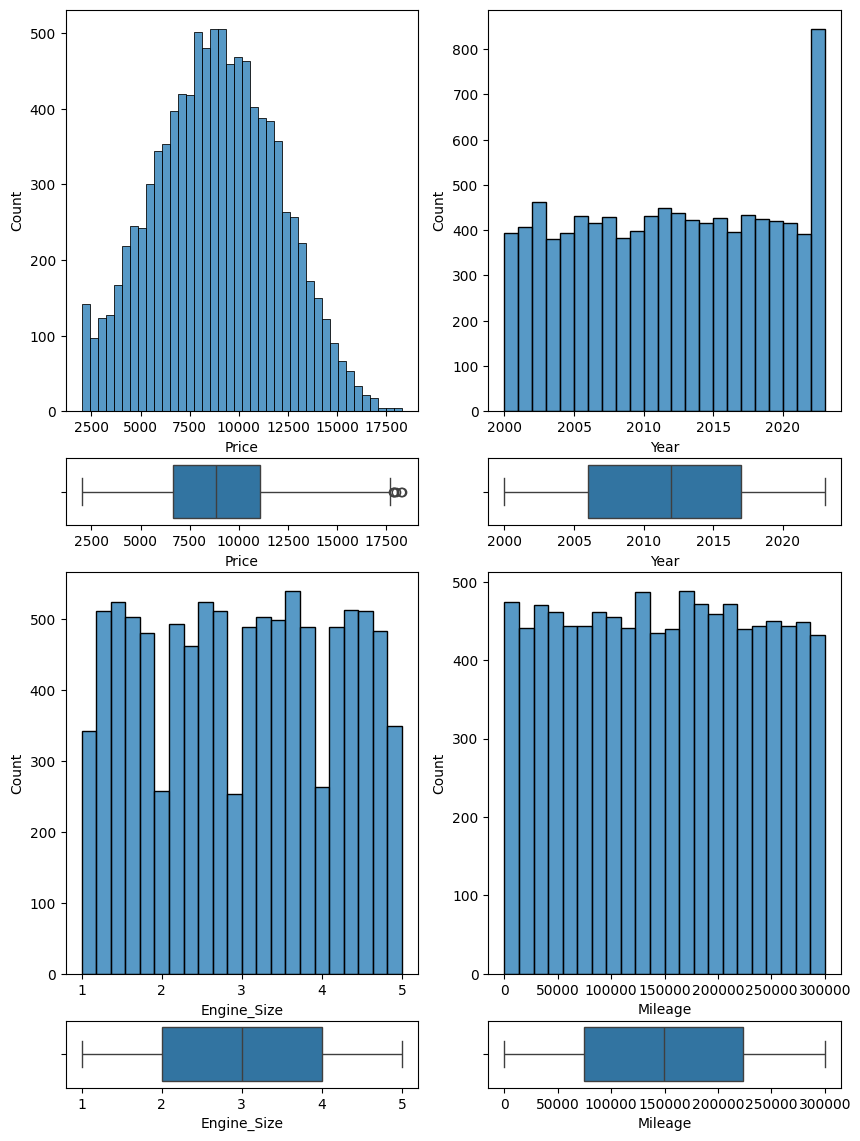

In [6]:
fig, axis = plt.subplots(4,2,figsize=(10,14),gridspec_kw={"height_ratios":[6,1,6,1]})

sns.histplot(ax= axis[0,0],data=sales_df,x='Price')
sns.boxplot(ax=axis[1,0],data=sales_df,x='Price')
sns.histplot(ax= axis[0,1],data=sales_df,x='Year')#.set_xlim(0,60)
sns.boxplot(ax=axis[1,1],data=sales_df,x='Year')#.set_xlim(0,60)
sns.histplot(ax= axis[2,0],data=sales_df,x='Engine_Size')
sns.boxplot(ax=axis[3,0],data=sales_df,x='Engine_Size')
sns.histplot(ax= axis[2,1],data=sales_df,x='Mileage')#.set_xlim(0,100)
sns.boxplot(ax=axis[3,1],data=sales_df,x='Mileage')#.set_xlim(0,100)


In [7]:
#Análisis numérico-categórico
sales_df["Brand"] = pd.factorize(sales_df["Brand"])[0]
sales_df["Model"] = pd.factorize(sales_df["Model"])[0]
sales_df["Fuel_Type"] = pd.factorize(sales_df["Fuel_Type"])[0]
sales_df["Transmission"] = pd.factorize(sales_df["Transmission"])[0]

sales_df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,0,0,2020,4.2,0,0,289944,3,5,8501
1,1,1,2012,2.0,1,1,5356,2,3,12092
2,2,2,2020,4.2,0,1,231440,4,2,11171
3,3,3,2023,2.0,2,0,160971,2,1,11780
4,4,4,2003,2.6,1,2,286618,3,3,2867


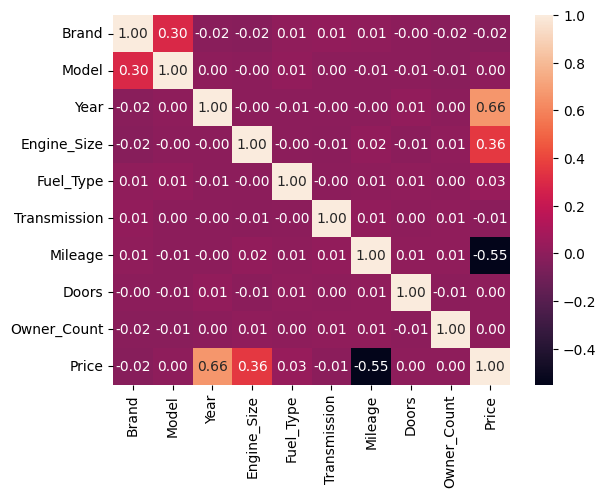

In [8]:
sns.heatmap(sales_df.corr(), annot = True, fmt = ".2f")
plt.show()

In [9]:
sales_df.columns

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')

<Axes: ylabel='Transmission'>

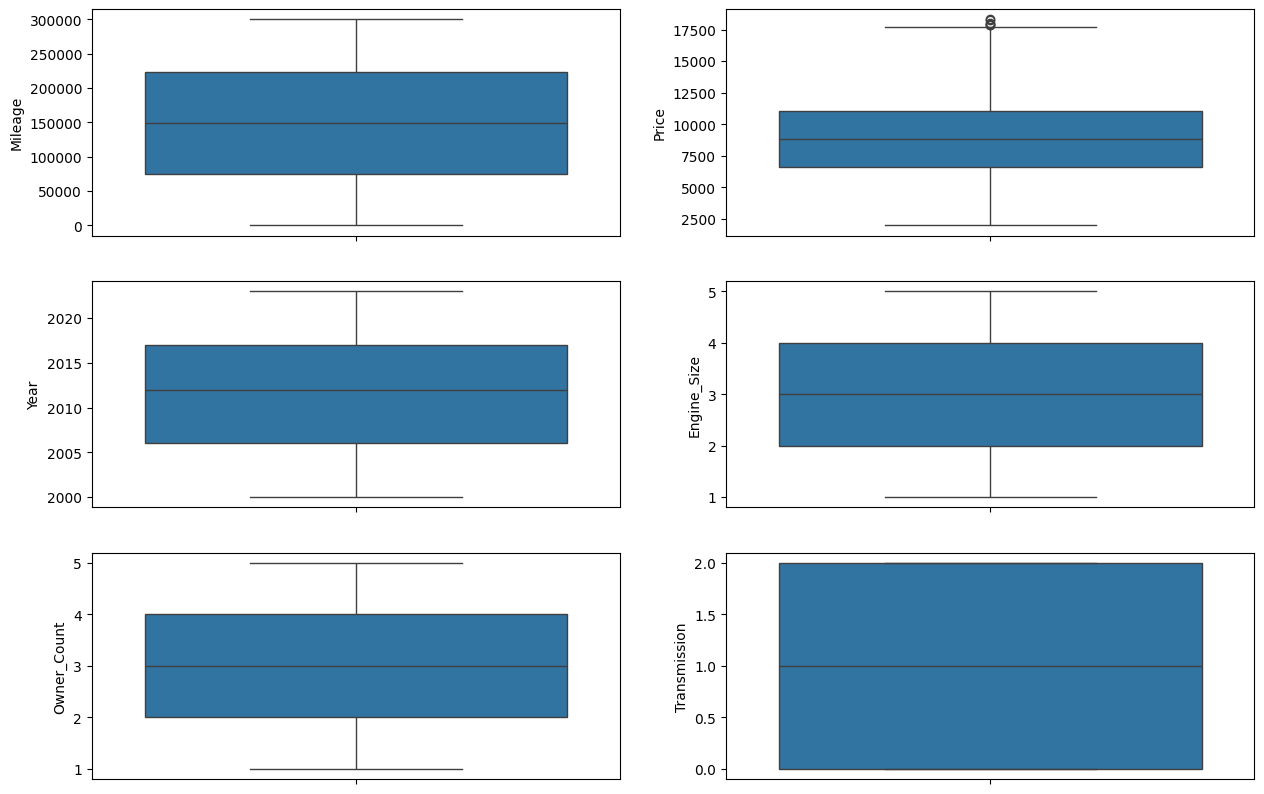

In [10]:
fig, axis = plt.subplots(3, 2, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = sales_df, y = "Mileage")
sns.boxplot(ax = axis[0, 1], data = sales_df, y = "Price")
sns.boxplot(ax = axis[1, 0], data = sales_df, y = "Year")
sns.boxplot(ax = axis[1, 1], data = sales_df, y = "Engine_Size")
sns.boxplot(ax = axis[2, 0], data = sales_df, y = "Owner_Count")
sns.boxplot(ax = axis[2, 1], data = sales_df, y = "Transmission")

In [11]:
def analisis_ric(columna,df):
    estadisticas = df[columna].describe()
    ric = estadisticas['75%'] - estadisticas['25%']
    lim_sup = estadisticas['75%'] + 1.5*ric
    lim_inf = estadisticas['25%'] - 1.5*ric 
    print(f'superior {lim_sup} e inferior {lim_inf}')

In [12]:
analisis_ric('Price',sales_df)

superior 17747.25 e inferior -14.75


In [13]:
sales_df.isnull().sum().sort_values(ascending=False)

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [14]:
#Escalar características
from sklearn.preprocessing import MinMaxScaler

variables = ['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price']
scaler = MinMaxScaler()
caracteristicas_escaladas = scaler.fit_transform(sales_df[variables])

sales_df_escalado = pd.DataFrame(caracteristicas_escaladas,index=sales_df.index, columns = variables )

sales_df_escalado.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,0.000000,0.000000,0.869565,0.80,0.000000,0.0,0.966648,0.333333,1.00,0.398810
1,0.111111,0.034483,0.521739,0.25,0.333333,0.5,0.017775,0.000000,0.50,0.619103
2,0.222222,0.068966,0.869565,0.80,0.000000,0.5,0.771584,0.666667,0.25,0.562604
3,0.333333,0.103448,1.000000,0.25,0.666667,0.0,0.536626,0.000000,0.00,0.599963
4,0.444444,0.137931,0.130435,0.40,0.333333,1.0,0.955558,0.333333,0.50,0.053187


In [15]:
#Selección de características
from sklearn.feature_selection import f_classif,SelectKBest
from sklearn.model_selection import train_test_split

X = sales_df_escalado.drop('Price',axis=1)
y = sales_df_escalado['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42) #utilizamos 42 porque fija el punto de partida del modelo

modelo_seleccion = SelectKBest(f_classif,k=5)
modelo_seleccion.fit(X_train,y_train)
ix = modelo_seleccion.get_support()

X_train_sel = pd.DataFrame(modelo_seleccion.transform(X_train),columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(modelo_seleccion.transform(X_test),columns=X_test.columns.values[ix])

In [16]:
X_train_sel['Price'] = list(y_train)
X_test_sel['Price'] = list(y_test)
X_train_sel.to_csv('../data/processed/train_limpio_esc.csv',index=False)
X_test_sel.to_csv('../data/processed/test_limpio_esc.csv',index=False)

In [17]:
import sklearn
print(sklearn.__version__)

1.6.1


In [18]:
from xgboost import XGBRegressor
#Iniciar el modelo
model = XGBRegressor(random_state = 42)

#Entrenar el modelo
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [19]:
y_pred = model.predict(X_test)
y_pred

array([-0.00435337,  0.58249885,  0.7678034 , ...,  0.37503955,
        0.27326804,  0.61839896], shape=(2000,), dtype=float32)

In [20]:
from sklearn.metrics import r2_score
#medir el nivel de ajuste entre los y de prueba (y_test) y los y predichos (y_pred)
r2_score(y_test, y_pred)

0.9931569969885626

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 0.01
MSE: 0.00
R2 Score: 0.99


In [22]:
from sklearn.metrics import mean_squared_error

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")

Mean squared error: 0.00023660849288956184


In [23]:
model.save_model("xgb_regressor_default_42_esc.json")

In [24]:
X_train

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count
9254,0.444444,0.137931,0.304348,0.550,0.333333,1.0,0.113106,1.000000,0.75
1561,0.777778,0.310345,0.434783,0.950,0.666667,1.0,0.749622,0.000000,0.00
1670,0.888889,0.896552,0.260870,0.225,0.333333,1.0,0.044712,0.333333,1.00
6087,0.666667,0.344828,0.826087,0.175,0.000000,1.0,0.666243,0.000000,0.50
6669,0.222222,0.862069,0.217391,0.650,1.000000,0.5,0.000787,0.333333,0.25
...,...,...,...,...,...,...,...,...,...
5734,0.777778,0.965517,0.391304,0.200,1.000000,1.0,0.938597,0.666667,0.00
5191,0.666667,0.344828,0.652174,0.875,0.666667,1.0,0.744147,0.333333,1.00
5390,0.777778,0.965517,0.260870,0.875,1.000000,1.0,0.180334,1.000000,1.00
860,0.555556,0.275862,0.695652,0.850,0.000000,1.0,0.883883,0.333333,0.75
